In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [15]:
FOLDER_PATH = "D:\\Google Drive\\Catherning Folder\\THU\\Thesis\\Recipe datasets\\"
DATASET = ["scirep-cuisines-detail","Yummly28"]
FILES = ["cleaned_data.pkl","full_data.pkl"]

In [16]:
df_train=pd.read_pickle(os.path.join(FOLDER_PATH,DATASET[1],FILES[1]))
df_train=df_train.reset_index()
df_train

,index,id,cuisine,ingredients,all_ingredients
0,0,0,Italian,"[baby bella mushroom sliced, arborio rice, oli...",baby bella mushroom sliced;arborio rice;olive ...
1,1,1,Barbecue,"[pork country style rib fat trimmed, soy sauce...",pork country style rib fat trimmed;soy sauce;w...
2,2,2,Italian,"[garlic, extra-virgin olive oil divided, madei...",garlic;extra-virgin olive oil divided;madeira ...
3,3,3,French,"[garlic halved, cooking spray, peeled red pota...",garlic halved;cooking spray;peeled red potato;...
4,4,4,Barbecue,"[lean ground beef, worcestershire sauce, liqui...",lean ground beef;worcestershire sauce;liquid s...
...,...,...,...,...,...
27633,27633,27633,Italian,"[zwiebeln, knoblauchzehen, dose dicke weisse b...",zwiebeln;knoblauchzehen;dose dicke weisse bohn...
27634,27634,27634,American,"[fresh lavender blossom, sugar, carrot juice, ...",fresh lavender blossom;sugar;carrot juice;pota...
27635,27635,27635,French,"[gr. bread flour, ml. water, gr. yeast, gr. st...",gr. bread flour;ml. water;gr. yeast;gr. strong...
27636,27636,27636,American,"[flour, unsweetened cocoa powder, baking soda,...",flour;unsweetened cocoa powder;baking soda;sal...


# Data analysis

American                11729
Italian                  4571
Mexican                  3394
Asian                    1951
French                   1562
Indian                   1457
Kid-Friendly              962
Southwestern              600
Thai                      347
Barbecue                  338
Chinese                   266
Southern & Soul Food      151
Greek                      80
Mediterranean              72
Spanish                    58
Cuban                      31
Cajun & Creole             18
Moroccan                   11
Japanese                   10
Irish                       9
English                     6
Hawaiian                    5
German                      4
Hungarian                   3
Portuguese                  2
Vietnamese                  1
Name: cuisine, dtype: int64

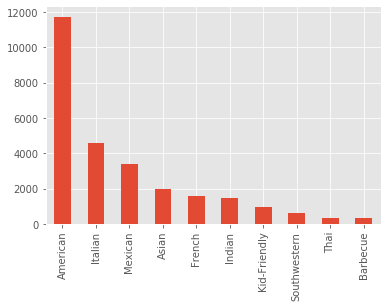

In [17]:
%matplotlib inline

plt.style.use('ggplot')
df_train['cuisine'].value_counts().head(10).plot(kind='bar')

df_train['cuisine'].value_counts()

Results are worse when we remove American recipes!
Check what exactly are those results
See if we should remove american, if yes, how to improve score ???

### Counter for ingredients

In [18]:
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [19]:
counters['French'].most_common(10)

[('salt', 512),
 ('flour', 417),
 ('unsalted butter', 347),
 ('sugar', 302),
 ('olive oil', 283),
 ('butter', 247),
 ('milk', 222),
 ('bay', 219),
 ('heavy cream', 209),
 ('dry white wine', 204)]

In [20]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
Italian,olive oil,salt,garlic minced,salt pepper,extra-virgin olive oil,grated parmesan cheese,dried oregano,flour,water,extra virgin olive oil
Barbecue,olive oil,salt,kosher salt,freshly ground black pepper,garlic minced,soy sauce,salt pepper,garlic powder,brown sugar,kosher salt freshly ground black pepper
French,salt,flour,unsalted butter,sugar,olive oil,butter,milk,bay,heavy cream,dry white wine
American,salt,sugar,flour,olive oil,water,cooking spray,fresh lemon juice,freshly ground black pepper,salt pepper,garlic minced
Asian,soy sauce,salt,sugar,sesame oil,fish sauce,water,vegetable oil,cornstarch,garlic minced,coconut milk
Kid-Friendly,flour,kosher salt,salt,granulated sugar,large egg,milk,vanilla extract,baking soda,butter,egg
Southwestern,chili powder,ground cumin,salt,olive oil,garlic minced,salt pepper,cumin,chopped fresh cilantro,smy cream,black bean drained rinsed
Mexican,salt,chili powder,olive oil,ground cumin,salt pepper,garlic minced,smy cream,corn tortilla,cumin,water
Indian,salt,garam masala,cumin seed,water,turmeric,ground cumin,garlic minced,cinnamon,ground coriander,vegetable oil
Southern & Soul Food,salt,flour,sugar,water,milk,salt pepper,vanilla extract,vegetable oil,unsalted butter,cayenne pepper


In [22]:
df_train['all_ingredients'].str.contains('garlic').value_counts()

False    15860
True     11778
Name: all_ingredients, dtype: int64

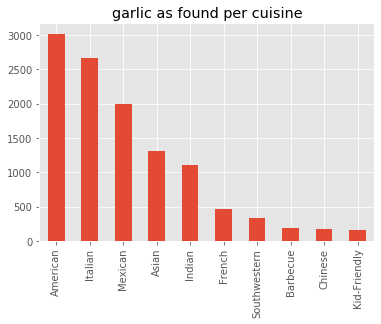

In [23]:
indices = df_train['all_ingredients'].str.contains('garlic')
df_train[indices]['cuisine'].value_counts().head(10).plot(kind='bar',
                                                 title='garlic as found per cuisine')

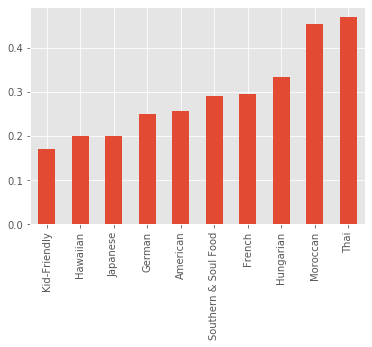

In [24]:
relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
relative_freq.sort_values(inplace=True)
relative_freq.head(10).plot(kind='bar')

In [25]:
unique = np.unique(top10.values.ravel())
unique.shape

(108,)

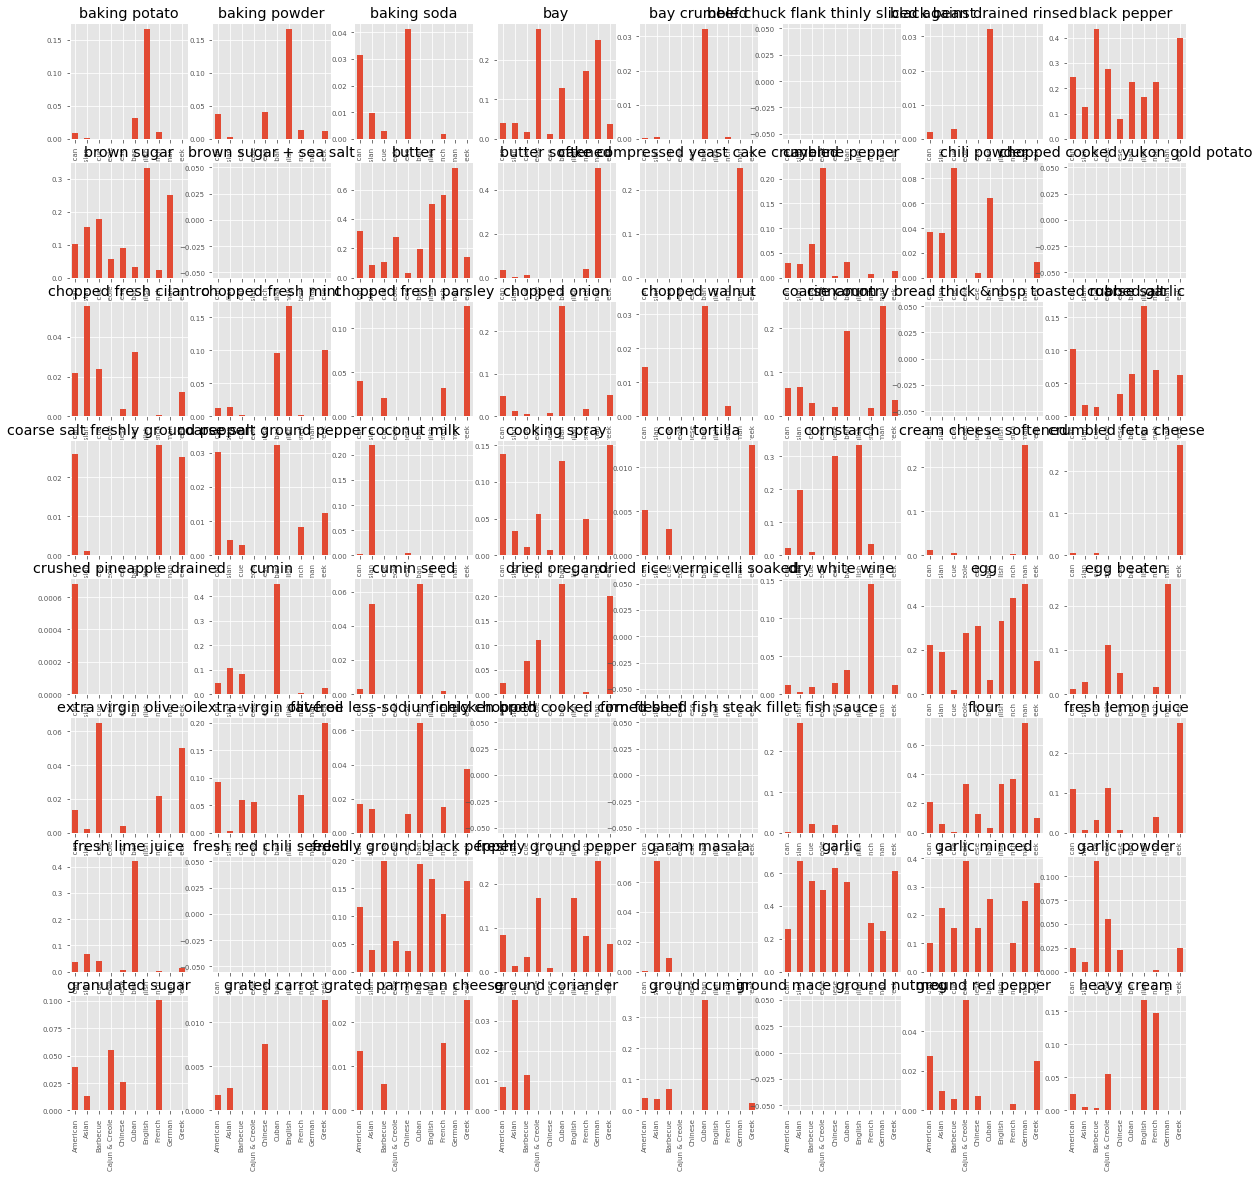

In [26]:
# spot ingredients which have a high degree of uniqueness

fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = df_train['all_ingredients'].str.contains(ingredient)
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
    relative_freq.head(10).plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)